<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

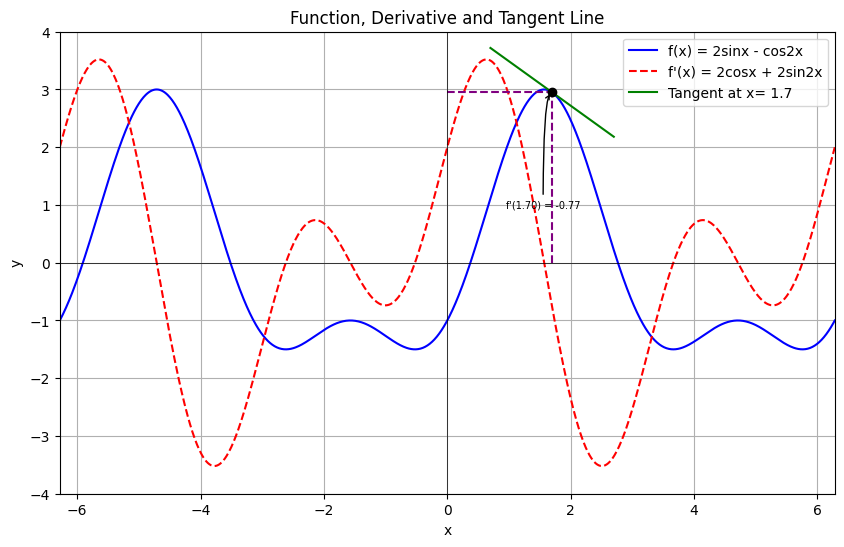

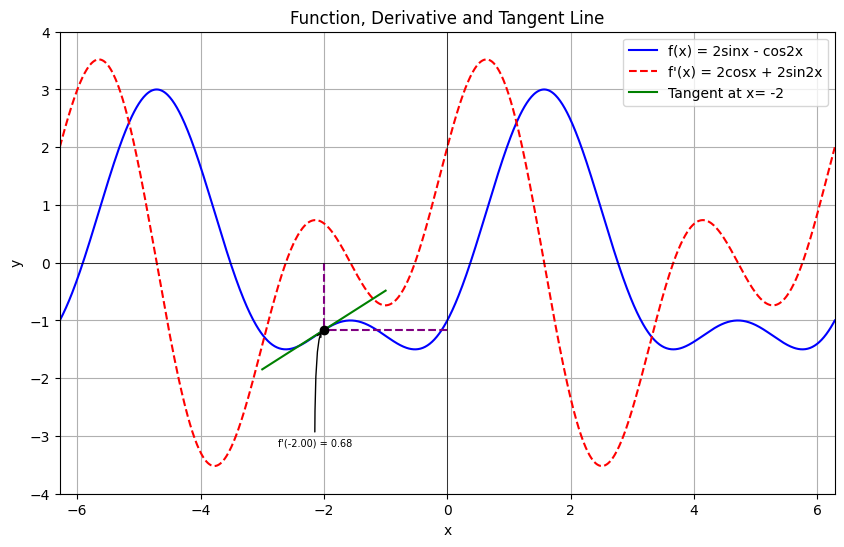

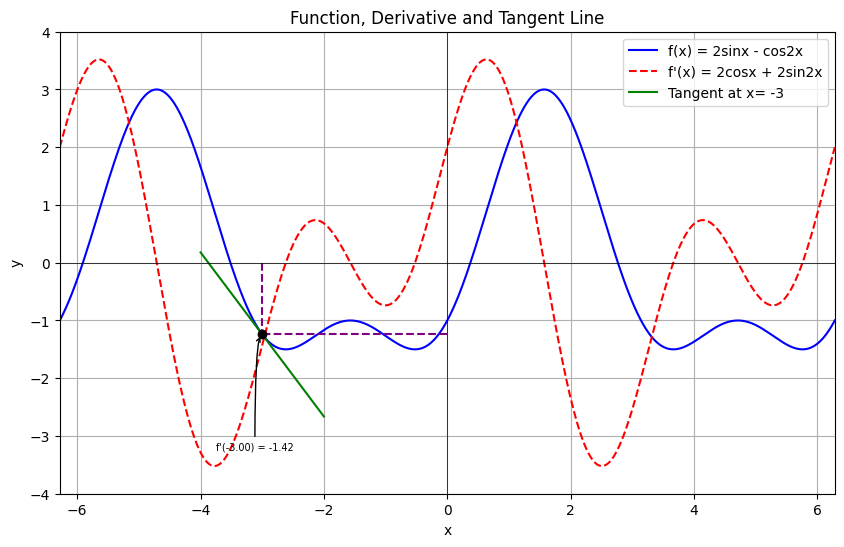

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x):
    def f(x):
        return 2 * np.sin(x) - np.cos(2 * x)
    def f_prime(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    tangent_vals = np.linspace(x-1, x+1, 1000)

    y_vals = f(x_vals)
    y_prime_vals = f_prime(x_vals)

    y_point = f(x)
    y_prime_point = f_prime(x)

    tangent_line = y_prime_point * (tangent_vals - x) + y_point

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, "b-", label='f(x) = 2sinx - cos2x')
    plt.plot(x_vals, y_prime_vals, "r--", label="f'(x) = 2cosx + 2sin2x")

    plt.plot(tangent_vals, tangent_line, "g-", label=f'Tangent at x= {x}')

    plt.plot([x, x], [0, f(x)], color = 'purple', linestyle = '--')
    plt.plot([0, x], [f(x), f(x)], color = 'purple', linestyle = '--')

    plt.plot(x, y_point, "ko")

    arrowprops = {'arrowstyle': '->', 'connectionstyle': 'angle3'}
    plt.annotate(f"f'({x:.2f}) = {f_prime(x):.2f}", xy=(x, f(x)), xytext=(x - 0.75, f(x) - 2), arrowprops=arrowprops, fontsize = 7)


    plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-2*np.pi, 2*np.pi, -4, 4])
    plt.title('Function, Derivative and Tangent Line')
    plt.legend()
    plt.grid(True)

    plt.show()

beauty_derivative_plot(1.7)

beauty_derivative_plot(-2)

beauty_derivative_plot(-3)



## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

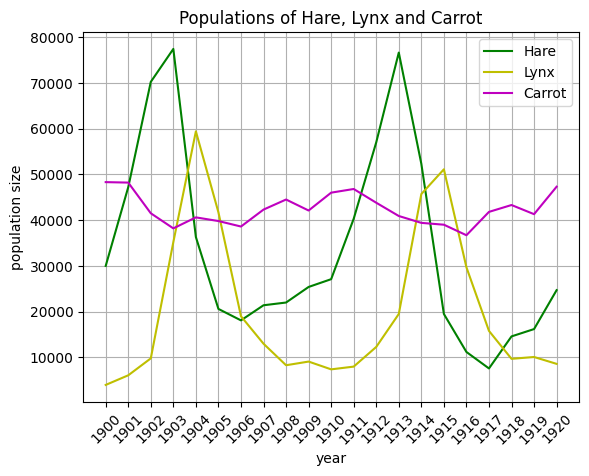

In [40]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')

years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]

plt.figure(figsize=(10, 6))

plt.plot(years, hare, "g-", label='Hare')
plt.plot(years, lynx, "y-", label='Lynx')
plt.plot(years, carrot, "m-", label='Carrot')

plt.legend()
plt.grid(True)
plt.xlabel('year')
plt.ylabel('population size')
plt.xticks(range(1900, 1921, 1), rotation = 45)
plt.title('Populations of Hare, Lynx and Carrot')
plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

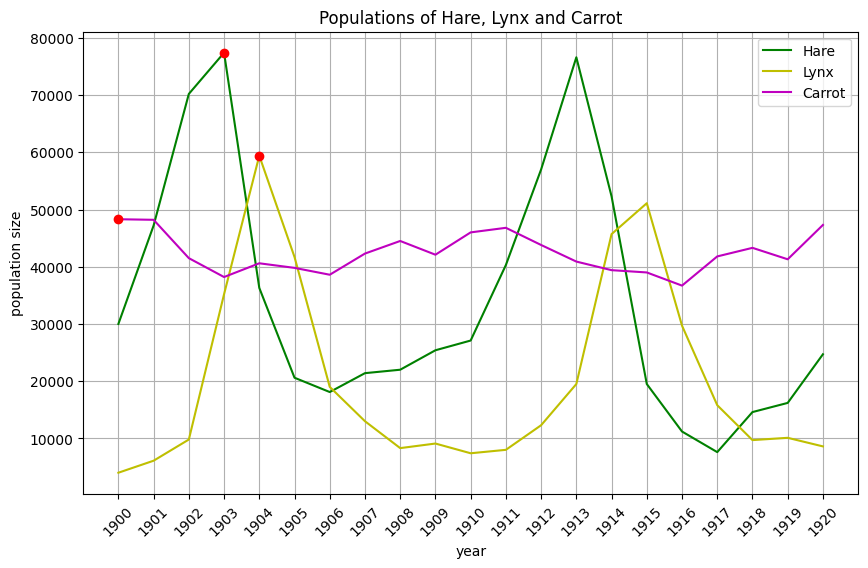

1900.0 1903.0 1904.0


In [41]:
max_carrot_year = years[np.argmax(carrot)]
max_hare_year = years[np.argmax(hare)]
max_lynx_year = years[np.argmax(lynx)]

plt.figure(figsize=(10, 6))

plt.plot(years, hare, "g-", label='Hare')
plt.plot(years, lynx, "y-", label='Lynx')
plt.plot(years, carrot, "m-", label='Carrot')

plt.legend()
plt.grid(True)
plt.xlabel('year')
plt.ylabel('population size')
plt.xticks(range(1900, 1921, 1), rotation = 45)
plt.title('Populations of Hare, Lynx and Carrot')

plt.plot(max_carrot_year, np.max(carrot), "ro")
plt.plot(max_hare_year, np.max(hare), "ro")
plt.plot(max_lynx_year, np.max(lynx), "ro")

plt.show()

print(max_carrot_year, max_hare_year, max_lynx_year)


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

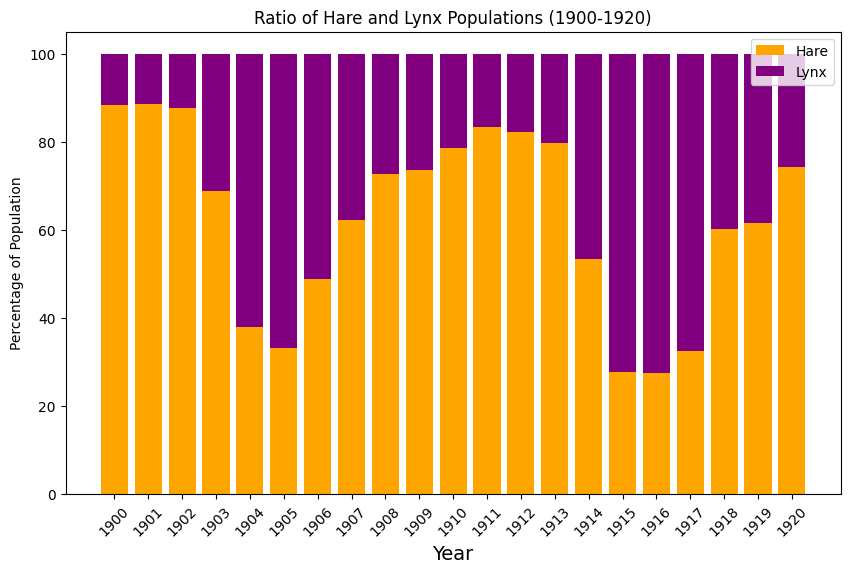

In [52]:
total_population = hare + lynx
hare_percent = (hare / total_population) * 100
lynx_percent = (lynx / total_population) * 100

plt.figure(figsize=(10, 6))

plt.bar(years, hare_percent, label='Hare', color='orange')
plt.bar(years, lynx_percent, bottom=hare_percent, label='Lynx', color='purple')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Population')
plt.title('Ratio of Hare and Lynx Populations (1900-1920)')
plt.xticks(years, rotation=45)
plt.yticks()
plt.legend()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

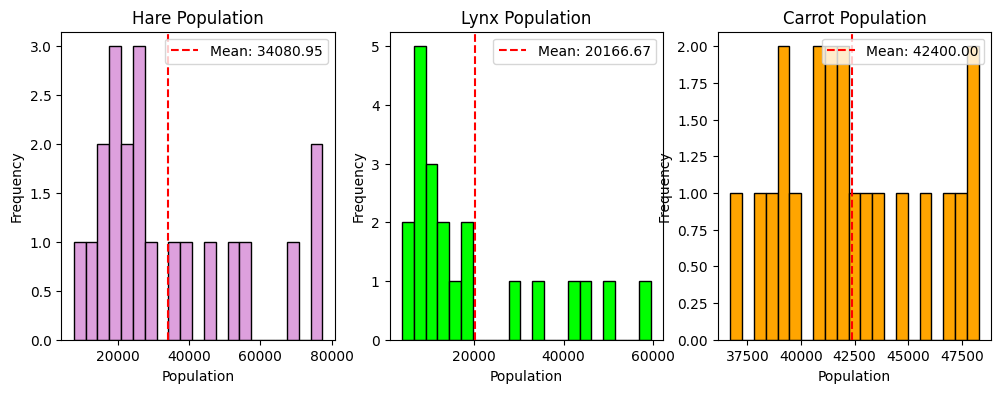

Hare: Mean = 34080.95, Std = 20897.91
Lynx: Mean = 20166.67, Std = 16254.59
Carrot: Mean = 42400.00, Std = 3322.51


In [70]:
mean_hare = np.mean(hare)
std_hare = np.std(hare)



mean_lynx = np.mean(lynx)
std_lynx = np.std(lynx)

mean_carrot = np.mean(carrot)
std_carrot = np.std(carrot)

figure = plt.figure(1, figsize = (12, 4))

plt.subplot(131)
plt.hist(hare, bins = np.size(hare), color='plum', edgecolor='black')
plt.axvline(mean_hare, color='red', linestyle='dashed', label=f'Mean: {mean_hare:.2f}')
plt.title('Hare Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(132)
plt.hist(lynx, bins = np.size(lynx), color='lime', edgecolor='black')
plt.axvline(mean_lynx, color='red', linestyle='dashed', label=f'Mean: {mean_lynx:.2f}')
plt.title('Lynx Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(133)
plt.hist(carrot, bins = np.size(carrot), color='orange', edgecolor='black')
plt.axvline(mean_carrot, color='red', linestyle='dashed', label=f'Mean: {mean_carrot:.2f}')
plt.title('Carrot Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.show()

print(f"Hare: Mean = {mean_hare:.2f}, Std = {std_hare:.2f}")
print(f"Lynx: Mean = {mean_lynx:.2f}, Std = {std_lynx:.2f}")
print(f"Carrot: Mean = {mean_carrot:.2f}, Std = {std_carrot:.2f}")

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


Text(0.5, 1.0, 'Ratio of Largest Population')

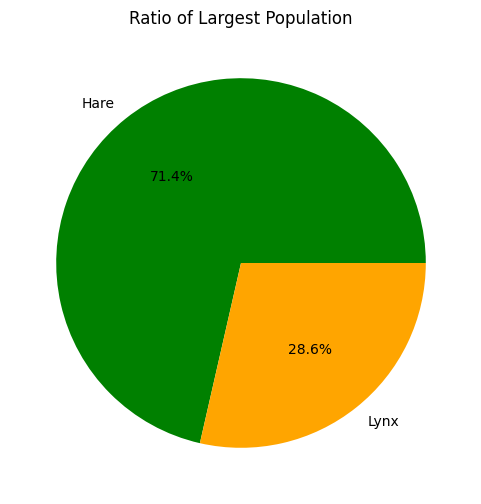

In [75]:
result = np.where(hare > lynx, 'H', 'L')
print(result)

count_H = np.sum(result == 'H')
count_L = np.sum(result == 'L')

plt.figure(figsize=(6, 6))
plt.pie([count_H, count_L], labels=['Hare', 'Lynx'], autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Ratio of Largest Population')


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

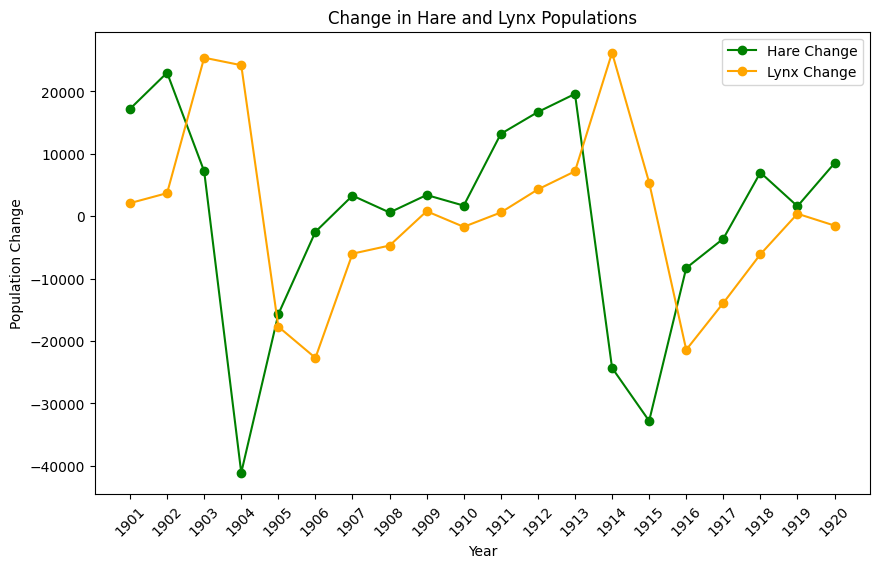

Correlation Coefficient between Hare and Lynx Population Changes: -0.18


In [83]:
hare_change = np.diff(hare)
lynx_change = np.diff(lynx)

years_change = years[1:]

plt.figure(figsize=(10, 6))
plt.plot(years_change, hare_change, label='Hare Change', color='green', marker='o')
plt.plot(years_change, lynx_change, label='Lynx Change', color='orange', marker='o')

plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Hare and Lynx Populations')
plt.xticks(years_change, rotation=45)
plt.legend()

plt.show()
correlation_coefficient = np.corrcoef(hare_change, lynx_change)[0, 1]
print(f"Correlation Coefficient between Hare and Lynx Population Changes: {correlation_coefficient:.2f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

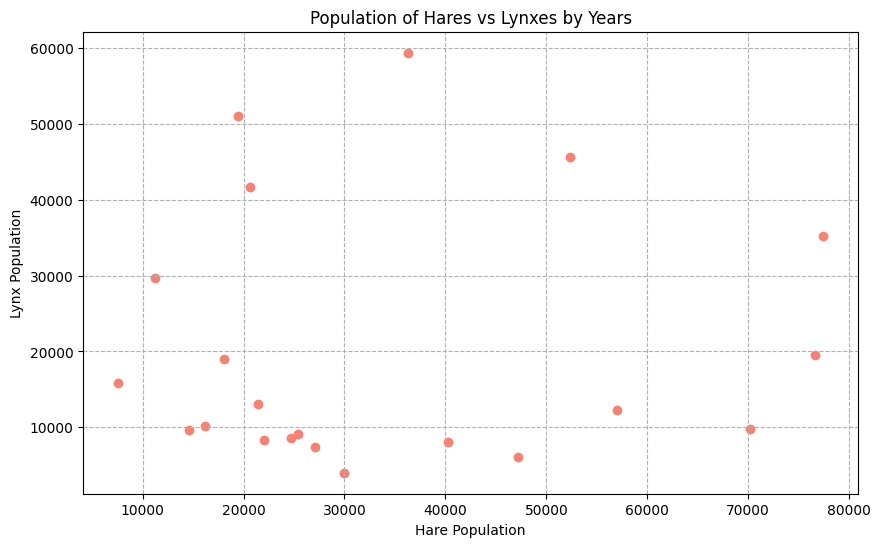

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(hare, lynx, color='salmon')

plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Population of Hares vs Lynxes by Years')
plt.grid(True, linestyle='--')

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [100]:
slope, intercept = np.polyfit(years[:-1], hare[:-1], 1)
estimated = slope * years[-1] + intercept
error = np.abs(estimated - hare[-1]) / hare[-1]

print('estimated value: ', estimated)
print('real value: ', hare[-1])
print('error: ', error)

estimated value:  19775.789473683108
real value:  24700.0
error:  0.19936075005331547
